<a href="https://colab.research.google.com/github/benkatz232/predictor-explainer/blob/main/Batch_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
data = pd.read_csv(r'https://raw.githubusercontent.com/industrial-data/predictor-explainer/main/data/dryer_dataset_imanol_et_al_2022.csv')

In [22]:
example_data = data[(data['BatchID'] >= 10) & (data['BatchID'] < 20)]

In [23]:
example_data.columns

Index(['TS', 'Date[TS]', 'Month Year[TS]', 'Batch number', 'BatchID',
       'Batch time [h:min]', 'Total batch duration', 'Batch index',
       'Batch starts', 'Batch ends', 'BatchID (#)', 'Phase', 'Batch-Phase',
       'PhaseID', 'Phase time [h:min]', 'Total phase duration [h:min]',
       'PhaseID (#)', 'Aligned phase index', 'Phase index', 'Phase starts',
       'Phase ends', 'Y (Final solvent concentration) [%]', 'Selected',
       'Quality', 'Y1', 'Y2', 'Y3', 'Y4', 'Y5', 'Y6', 'Y7', 'Y8', 'Y9', 'Y10',
       'Y11', 'Tank level [%]', 'Differential pressure [mmHg]',
       'Dryer pressure [mmHg]', 'Power [W]', 'Agitator Speed [rpm]',
       'Torque [Nm]', 'Jacket Temp SP [degC]', 'Jacket Temp PV  [degC]',
       'abs(Jacket Temp SP-PV)  [degC]', 'Dryer Temp SP [degC]',
       'Dryer Temp PV [degC]', 'abs(Dryer Temp SP-PV)  [degC]', 'Z1', 'Z2',
       'Z3', 'Z4', 'Z5', 'Z6', 'Z7', 'Z8', 'Z9', 'Z10', 'Z11',
       'Z (Initial cake weight) [kg]', 'Level1', 'Temp1', 'Temp2', 'Time4',
 

([<matplotlib.axis.XTick at 0x7924eab34d60>,
 [Text(0, 0, '2021-08-08 5:31:46 AM'),
  Text(356, 0, '2021-08-08 11:27:46 AM'),
  Text(712, 0, '2021-08-08 5:23:46 PM'),
  Text(1068, 0, '2021-08-08 11:19:46 PM')])

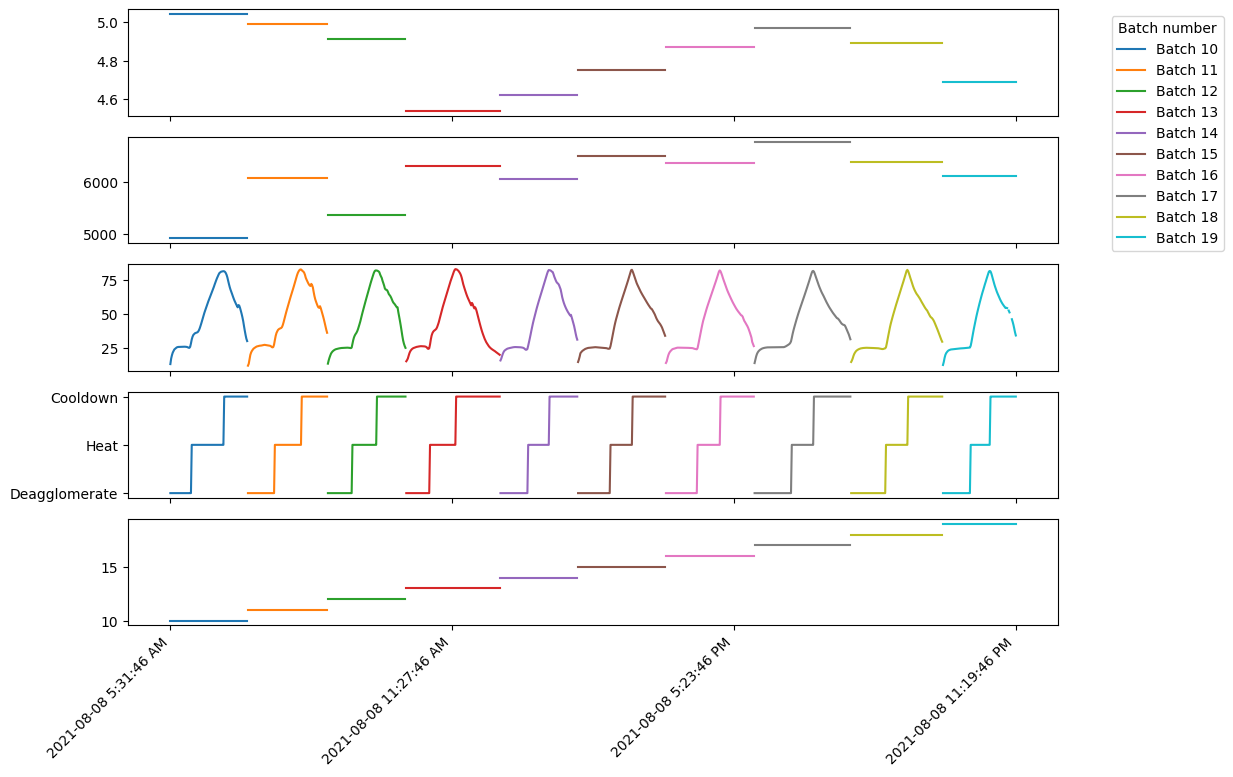

In [24]:
fig, axes = plt.subplots(nrows=5, ncols=1, sharex=True,
                                    figsize=(12, 8))
for ID in set(example_data['BatchID']):
  batch = example_data[example_data['BatchID'] == ID]
  axes[0].plot(batch['TS'],batch['Y (Final solvent concentration) [%]'], label = 'Batch ' + str(ID))
  axes[1].plot(batch['TS'],batch['Z (Initial cake weight) [kg]'], label = 'Batch ' + str(ID))
  axes[2].plot(batch['TS'],batch[ 'Dryer Temp PV [degC]'], label = 'Batch ' + str(ID))
  axes[3].plot(batch['TS'],batch['PhaseID'], label = 'Batch ' + str(ID))
  axes[4].plot(batch['TS'],batch['BatchID'], label = 'Batch ' + str(ID))
axes[0].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title = 'Batch number')
plt.xticks(np.arange(0,len(example_data['BatchID']), len(example_data['BatchID'])//3), rotation = 45, ha = 'right')

<ipython-input-57-d13cba8f5175>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  sub_ax.set_yticklabels(dates)


[Text(1, 0.0, '2021-08-07'),
 Text(1, 1.0, '2021-08-08'),
 Text(1, 2.0, '2021-08-09'),
 Text(1, 3.0, '2021-08-10'),
 Text(1, 4.0, '2021-08-11'),
 Text(1, 5.0, '2021-08-12'),
 Text(1, 6.0, '2021-08-13')]

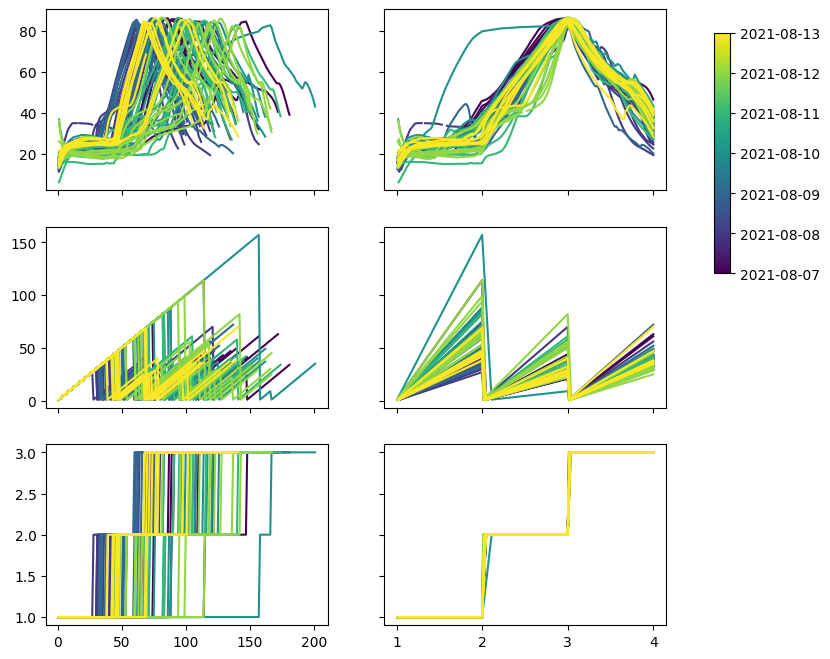

In [57]:
import matplotlib.colors as mcolors
import matplotlib.cm as cm
dates = data['Date[TS]'].unique()
normalize = mcolors.Normalize(vmin=0, vmax=len(dates)-1)
colormap = cm.viridis
date_dict = dict(zip(dates,np.arange(0,len(dates))))

def get_color(batch_start_date):
  return colormap(normalize(date_dict[batch_start_date]))

fig, axes = plt.subplots(nrows=3, ncols=2, sharex='col', sharey = 'row',
                                    figsize=(8, 8))
for ID in set(data['BatchID']):
  batch = data[data['BatchID'] == ID]
  color = get_color(batch['Date[TS]'].iloc[0])
  axes[0,0].plot(batch[ 'Batch index'],batch['Dryer Temp PV [degC]'], c = color)
  axes[0,1].plot(batch['Aligned phase index'],batch['Dryer Temp PV [degC]'], c = color)
  axes[1,0].plot(batch[ 'Batch index'],batch[ 'Phase index'], c = color)
  axes[1,1].plot(batch['Aligned phase index'],batch['Phase index'], c = color)
  axes[2,0].plot(batch[ 'Batch index'],batch['PhaseID (#)'], c = color)
  axes[2,1].plot(batch['Aligned phase index'],batch['PhaseID (#)'], c = color)
#ax0.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title = 'Batch number')
#plt.sca(axes[1,0])
#plt.xticks(np.arange(0,len(example_data['BatchID']), len(example_data['BatchID'])//3), rotation = 45, ha = 'right')
scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
sub_ax = plt.axes([0.96, 0.55, 0.02, 0.3]) # add a small custom axis
plt.colorbar(scalarmappaple, cax = sub_ax)
sub_ax.set_yticklabels(dates)

In [49]:
date_dict

{'2021-08-07': 0,
 '2021-08-08': 1,
 '2021-08-09': 2,
 '2021-08-10': 3,
 '2021-08-11': 4,
 '2021-08-12': 5,
 '2021-08-13': 6}

In [47]:
data['Date[TS]'].unique()

array(['2021-08-07', '2021-08-08', '2021-08-09', '2021-08-10',
       '2021-08-11', '2021-08-12', '2021-08-13'], dtype=object)

In [50]:
np.arange(0,len(dates))

array([0, 1, 2, 3, 4, 5, 6])